# PeakAffectDS Analysis

## Load Libraries

Here the relevant libraries needed to properly analyze the data are loaded. The Pandas library is used to load the data into dataframes, and the NeuroKit2 library is used to perform most of the transformations on the data.

In [1]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import ipympl

%matplotlib widget

## Importing Data

In [44]:
#
# Load data from subject 1 while watching the happy video
#

s1_happy = pd.read_csv('Data/Raw_PID_01-10/03/03-02-03.csv')
print('rows =', len(s1_happy.index))
s1_happy.head()

rows = 315672


,Time,EMG_zyg,EMG_cor,ECG,Respiration,Events
0,0.0005,0.000610,0.004272,0.135193,0.375671,0.0
1,0.0010,0.003662,-0.003052,0.132446,0.375671,0.0
2,0.0015,0.006409,-0.011902,0.130310,0.375671,0.0
3,0.0020,0.008240,-0.018921,0.127869,0.375671,0.0
4,0.0025,0.008240,-0.021667,0.125122,0.375671,0.0


## Processing Data

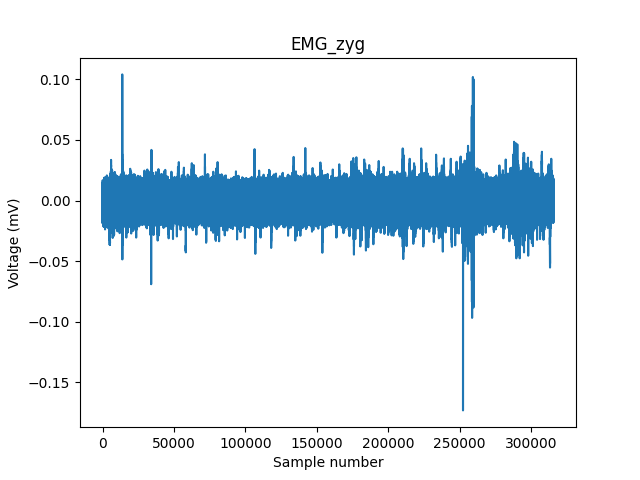

In [45]:
#
# Plot EMG_zyg
#

plt.clf()
plt.plot(s1_happy['EMG_zyg'])
plt.xlabel('Sample number')
plt.ylabel('Voltage (mV)')
plt.title('EMG_zyg')
plt.show()

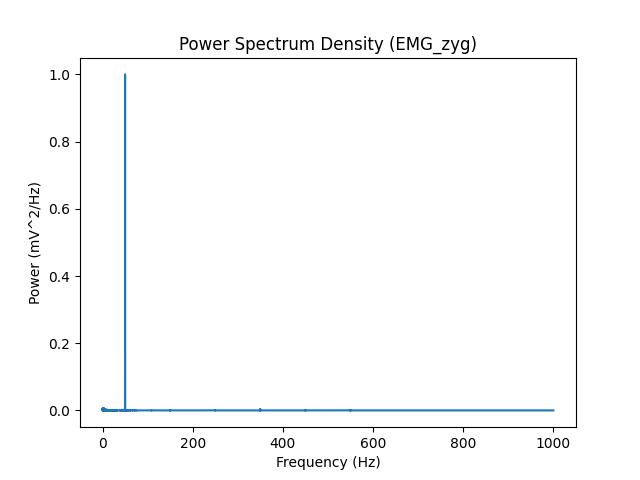

In [46]:
#
# Construct power spectral density for EMG_zyg
#

psd_emg_zyg = nk.signal_psd(s1_happy['EMG_zyg'], sampling_rate=2000)

plt.clf()
plt.plot(psd_emg_zyg['Frequency'], psd_emg_zyg['Power'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (mV^2/Hz)')
plt.title('Power Spectrum Density (EMG_zyg)')
plt.show()

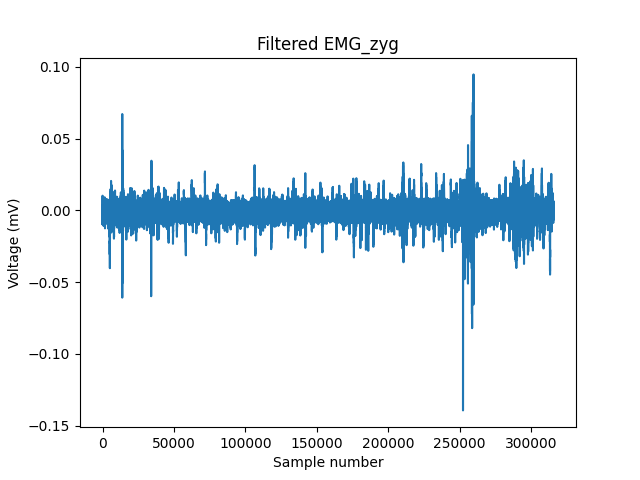

In [47]:
# Apply a notch filter to input data
#          data <- Data to apply filter to
#          freq <- Frequency to filter out
#             Q <- Quality score for filter
# sampling_rate <- Sampling rate of data
def apply_notch_filter(data, freq, Q, sampling_rate):
    # Normalize filtering frequency
    nyq_freq = sampling_rate / 2
    norm_freq = freq / nyq_freq
    
    # Use scipy notch filter using normalized frequency
    b, a = scipy.signal.iirnotch(norm_freq, Q)
    filtered_data = scipy.signal.lfilter(b, a, data)
    
    return filtered_data

sampling_rate = 2000
Q = 2

filtered_emg_zyg = apply_notch_filter(s1_happy['EMG_zyg'], 50, Q, sampling_rate)

plt.clf()
plt.plot(filtered_emg_zyg)
plt.xlabel('Sample number')
plt.ylabel('Voltage (mV)')
plt.title('Filtered EMG_zyg')
plt.show()

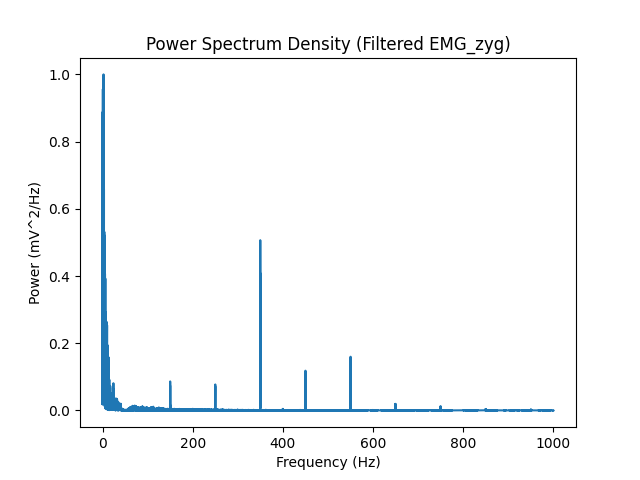

In [48]:
#
# Make filtered PSD
#

psd_filtered_emg_zyg = nk.signal_psd(filtered_emg_zyg, sampling_rate=sampling_rate)

plt.clf()
plt.plot(psd_filtered_emg_zyg['Frequency'], psd_filtered_emg_zyg['Power'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (mV^2/Hz)')
plt.title('Power Spectrum Density (Filtered EMG_zyg)')
plt.show()

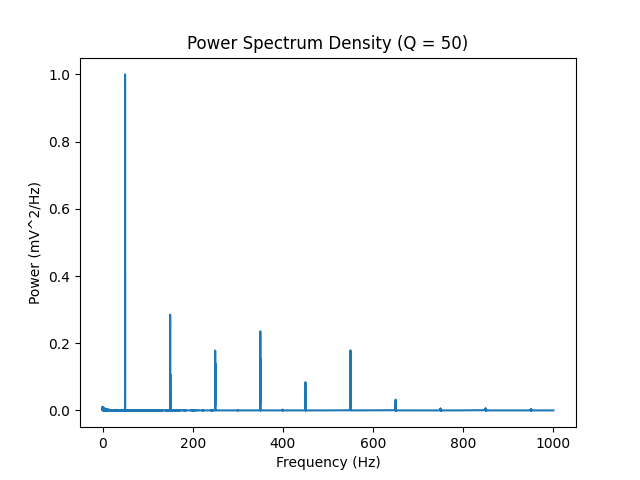

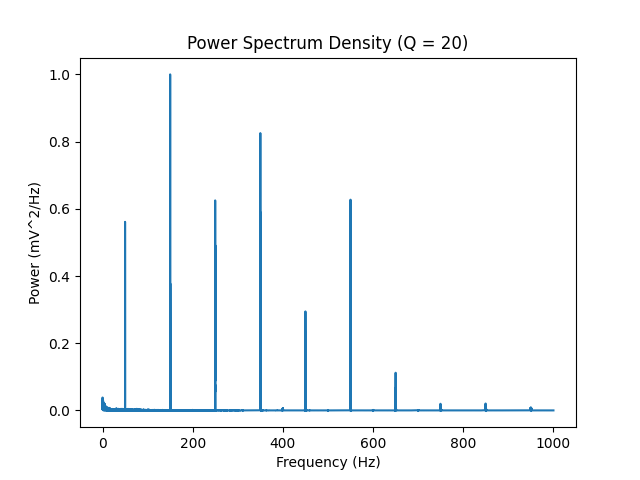

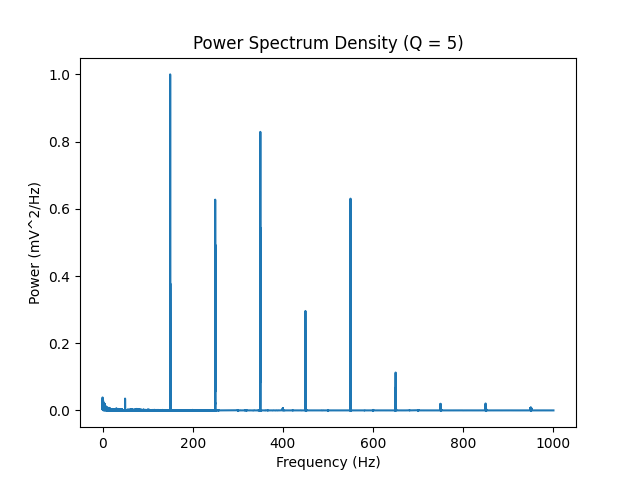

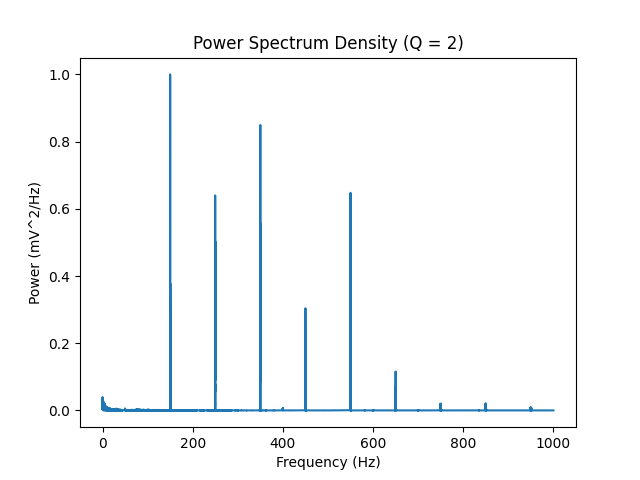

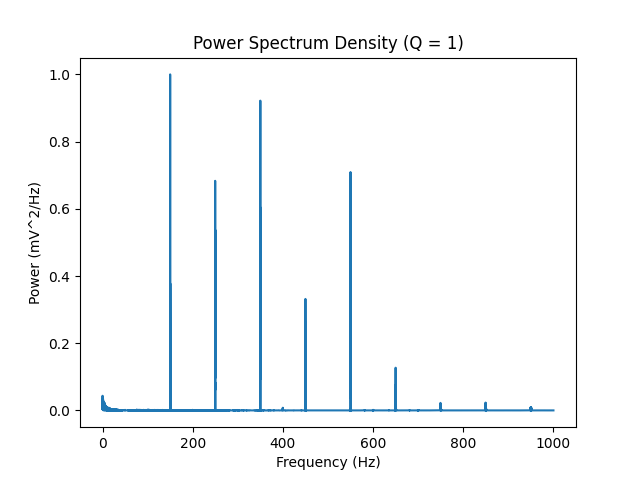

In [12]:
for Q in [50, 20, 5, 2, 1]:
    zyg = apply_notch_filter(s1_happy['EMG_zyg'], 50, Q, sampling_rate)
    psd = nk.signal_psd(zyg, sampling_rate=sampling_rate)
    
    plt.clf()
    plt.plot(psd['Frequency'], psd['Power'])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power (mV^2/Hz)')
    plt.title('Power Spectrum Density (Q = ' + str(Q) + ')')
    plt.show()

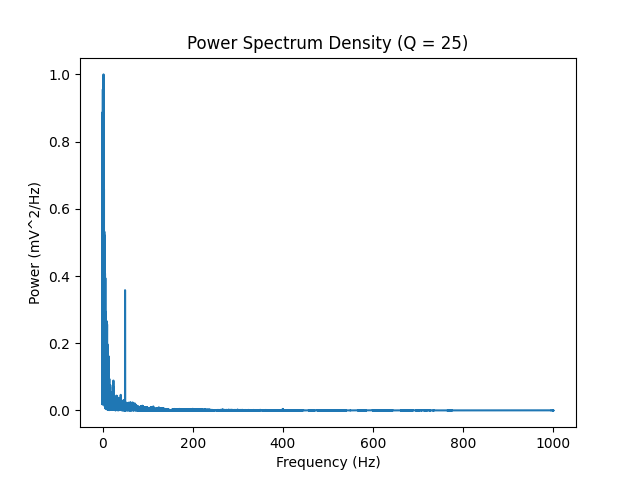

In [49]:
Q = 25

zyg = s1_happy['EMG_zyg']
for Hz in range(50, 1000, 100):
    zyg = apply_notch_filter(zyg, Hz, Q, sampling_rate)

psd = nk.signal_psd(zyg, sampling_rate=sampling_rate)

plt.clf()
plt.plot(psd['Frequency'], psd['Power'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (mV^2/Hz)')
plt.title('Power Spectrum Density (Q = ' + str(Q) + ')')
plt.show()

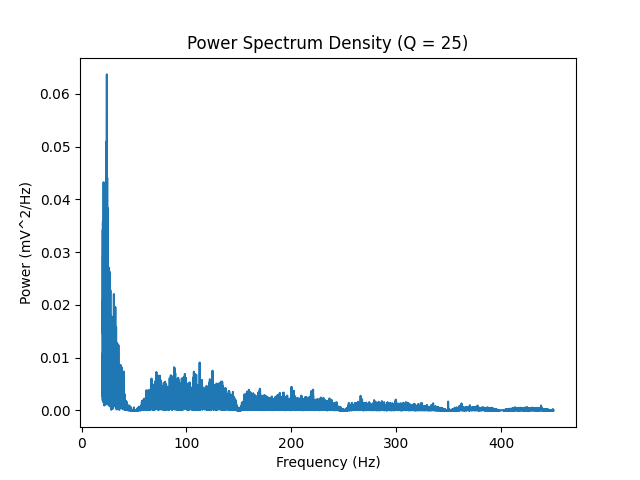

In [51]:
#
# Applying non-uniform notch filter
#

Hzs = [50, 150, 250, 350, 400, 450, 550, 650, 750, 850, 950]
#Qs =  [ 1,  25,  30,  25,  25,  45,  25,  30,  25,  50,  55]
Qs =  [ 1,  25,  25,  25,  25,  25,  25,  25,  25,  25,  25]

zyg = s1_happy['EMG_zyg']
for i in range(len(Hzs)):
    zyg = apply_notch_filter(zyg, Hzs[i], Qs[i], sampling_rate)

psd = nk.signal_psd(zyg, sampling_rate=sampling_rate)

def zoomIn(data, a, b):
    data = data[data['Frequency'] >= a]
    data = data[data['Frequency'] <= b]
    return data

psd = zoomIn(psd, 20, 450)
    
plt.clf()
plt.plot(psd['Frequency'], psd['Power'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (mV^2/Hz)')
plt.title('Power Spectrum Density (Q = ' + str(Q) + ')')
plt.show()

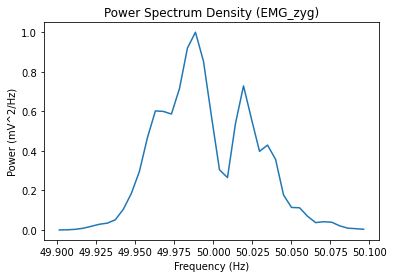

In [10]:
#
# Zoom in on 50 Hz
#

psd_emg_zyg = psd_emg_zyg[psd_emg_zyg['Frequency'] >= 49.9]
psd_emg_zyg = psd_emg_zyg[psd_emg_zyg['Frequency'] <= 50.1]

plt.plot(psd_emg_zyg['Frequency'], psd_emg_zyg['Power'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (mV^2/Hz)')
plt.title('Power Spectrum Density (EMG_zyg)')
plt.show()

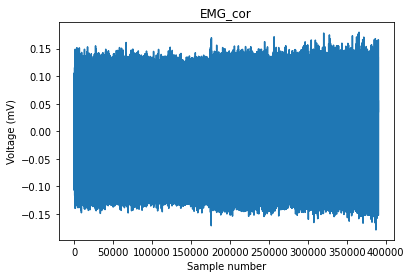

In [11]:
#
# Plot EMG_cor
#

plt.plot(s1_happy['EMG_cor'])
plt.xlabel('Sample number')
plt.ylabel('Voltage (mV)')
plt.title('EMG_cor')
plt.show()

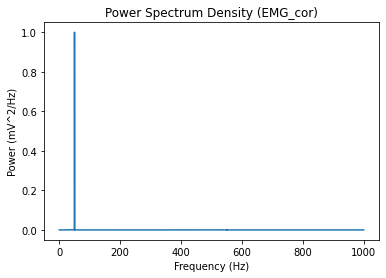

In [12]:
#
# Construct power spectral density for EMG_cor
#

psd_emg_cor = nk.signal_psd(s1_happy['EMG_cor'], sampling_rate=2000)

plt.plot(psd_emg_cor['Frequency'], psd_emg_cor['Power'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (mV^2/Hz)')
plt.title('Power Spectrum Density (EMG_cor)')
plt.show()

In [52]:
#
# Zoom in on 50 Hz
#

psd_emg_cor = psd_emg_cor[psd_emg_cor['Frequency'] >= 49.9]
psd_emg_cor = psd_emg_cor[psd_emg_cor['Frequency'] <= 50.1]

plt.plot(psd_emg_cor['Frequency'], psd_emg_cor['Power'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (mV^2/Hz)')
plt.title('Power Spectrum Density (EMG_cor)')
plt.show()

NameError: name 'psd_emg_cor' is not defined

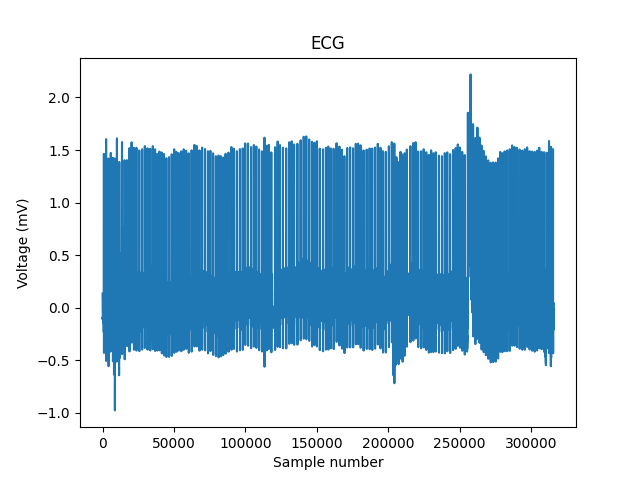

In [54]:
#
# Plot ECG
#

plt.clf()
plt.plot(s1_happy['ECG'])
plt.xlabel('Sample number')
plt.ylabel('Voltage (mV)')
plt.title('ECG')
plt.show()

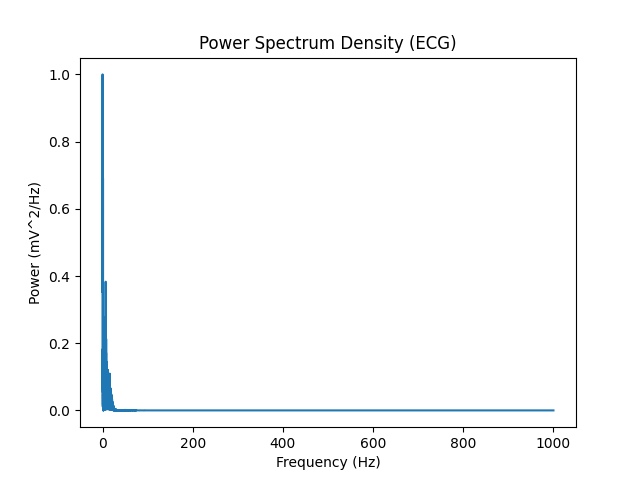

In [55]:
#
# Construct power spectral density for ECG
#

psd_ecg = nk.signal_psd(s1_happy['ECG'], sampling_rate=2000)

plt.clf()
plt.plot(psd_ecg['Frequency'], psd_ecg['Power'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (mV^2/Hz)')
plt.title('Power Spectrum Density (ECG)')
plt.show()

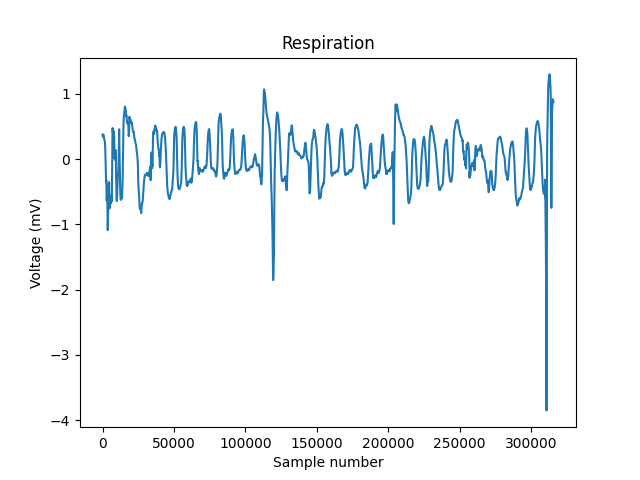

In [58]:
#
# Plot Respiration
#

plt.clf()
plt.plot(s1_happy['Respiration'])
plt.xlabel('Sample number')
plt.ylabel('Voltage (mV)')
plt.title('Respiration')
plt.show()

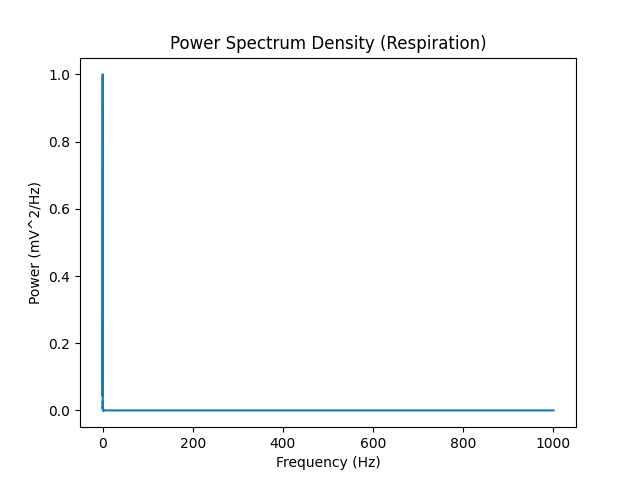

In [57]:
#
# Construct power spectral density for ECG
#

psd_resp = nk.signal_psd(s1_happy['Respiration'], sampling_rate=2000)

plt.clf()
plt.plot(psd_resp['Frequency'], psd_resp['Power'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (mV^2/Hz)')
plt.title('Power Spectrum Density (Respiration)')
plt.show()